# Marketing Campaign - Target Advertising

# Part 1 - DEFINE

### ---- 1 Define the problem ----

In [1]:
#import your libraries
import pandas as pd #dataframe adjustments
import sklearn as sk #preprocessing, regression, clustering
import numpy as np#basic array operations
import seaborn as sns #visualizations - ext on matplot
import matplotlib.pyplot as plt #wide range of vizualtions
#etc

#your info here
__author__ = "Daniel Murphy"
__email__ = "DanielDataScience@gmail.com"



## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
path ='C:/Users/thema/Desktop/DSDJ/advertising/advertising.csv' 
df = pd.read_csv(path)

df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


### ---- 3 Clean the data ----

In [3]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
# The data set came precleaned.
# Examples of cleaning data would include:
#<!--identifying and potentially replacing missing data
    # example code - We must first "import numpy as np"
    #df.replace("X",np.NAN, inplace = true)
    #df.head(5)
#--!>
missing_data = df.isnull()
missing_data.head(20)
# true is missing while false is not missing

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [4]:
filename = 'C:/Users/thema/Desktop/DSDJ/advertising/advertising.csv'


In [5]:
Headers = ["Daily Time Spent on Site","Age","Area Income","Daily Internet Usage","Ad Topic Line","City","Male","Country","Timestamp","Clicked on Ad"]


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Daily Time Spent on Site
False    1000
Name: Daily Time Spent on Site, dtype: int64

Age
False    1000
Name: Age, dtype: int64

Area Income
False    1000
Name: Area Income, dtype: int64

Daily Internet Usage
False    1000
Name: Daily Internet Usage, dtype: int64

Ad Topic Line
False    1000
Name: Ad Topic Line, dtype: int64

City
False    1000
Name: City, dtype: int64

Male
False    1000
Name: Male, dtype: int64

Country
False    1000
Name: Country, dtype: int64

Timestamp
False    1000
Name: Timestamp, dtype: int64

Clicked on Ad
False    1000
Name: Clicked on Ad, dtype: int64



In this case, all cells have 1000 lines of code with no missing data indicated by the word false. 
If data was missing I could either drop data or replace data. 

If I were to go the route of replacing the data then I can fill the empty spots with the mean, frequency or just droping the entire row. 

In [7]:
#How to calculate the mean of a row

avg_age = df["Age"].astype("float").mean(axis=0)
print("Average Age:", avg_age)

Average Age: 36.009


### ---- 4 Explore the data (EDA) ----

In [8]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features
import seaborn as sns
%matplotlib inline 
    #to plot in jupyter notebook


To determine which visualizations we need to find the cell type(s).

In [9]:
print(df.dtypes)

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object


## To determine correlation between cells

In [10]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


A high correlation of people who clicked on the ad is associated with daily time spent on site and daily internet useage

## Correlation between specific columns

In [11]:
df[['Daily Time Spent on Site','Daily Internet Usage','Clicked on Ad']].corr()

,Daily Time Spent on Site,Daily Internet Usage,Clicked on Ad
Daily Time Spent on Site,1.000000,0.518658,-0.748117
Daily Internet Usage,0.518658,1.000000,-0.786539
Clicked on Ad,-0.748117,-0.786539,1.000000


## Visulizations

(0, 95.19040661568725)

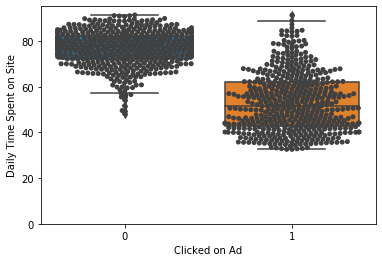

In [12]:
sns.boxplot(x = 'Clicked on Ad', y = 'Daily Time Spent on Site', data = df)
sns.swarmplot(x = 'Clicked on Ad', y = 'Daily Time Spent on Site', data = df,color =".25")
plt.ylim(0,)

(0, 280.51696495584986)

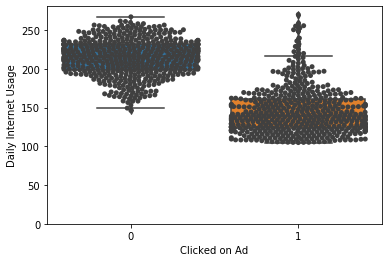

In [13]:
sns.boxplot(x = 'Clicked on Ad', y = 'Daily Internet Usage', data = df)
sns.swarmplot(x = 'Clicked on Ad', y = 'Daily Internet Usage', data = df,color =".25")
plt.ylim(0,)

(0, 63.691688845528624)

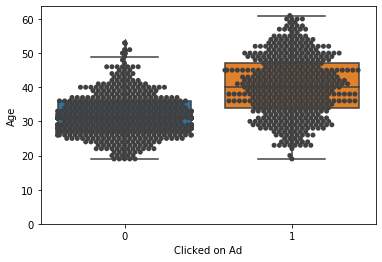

In [22]:
sns.boxplot(x = 'Clicked on Ad', y = 'Age', data = df)
sns.swarmplot(x = 'Clicked on Ad', y = 'Age', data = df,color =".25")
plt.ylim(0,)

Insight from visuals

We gain good knowledge from the visualizations. The older population and the people who spent less time on the site and subsequently on the internet as a whole clicked on the AD more. 



### Descriptive Statistical Analysis

Given the information about the dataset below and the information we gained from the visuals. 
The target audience will be: 
1 - People who spend less time on site. Mean - Std(standard deviation) 65 - 15.8 = 
    40.2 minutes of daily site activity
2 - People who spend less time on internet as a whole. Mean - Std. 180 - 43.9 = 
    136.1 average minutes on internet in general
3- People who are in the older cluster. Mean + Std = 36 + 8.8 = 
    44.8 years old

In [14]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [15]:
df.describe(include=['object'])

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Digitized global capability,Williamsport,France,2016-07-18 02:51:19
freq,1,3,9,1


## Value Counts is a good tool to dive into your variables. 

The information below shows the number of people(left column) for a specific age (right column). 

In [19]:
df['Age'].value_counts(normalize=False, sort=True, ascending=False).to_frame()

,Age
31,60
36,50
28,48
29,48
33,43
30,39
34,39
35,39
32,38
26,37


### Groupby 

In [20]:
df['Age'].unique()

array([35, 31, 26, 29, 23, 33, 48, 30, 20, 49, 37, 24, 41, 36, 40, 52, 28,
       34, 22, 57, 53, 39, 46, 32, 25, 43, 45, 50, 47, 27, 42, 38, 54, 21,
       60, 55, 44, 58, 56, 51, 19, 59, 61], dtype=int64)

Lets find the mean of 'clicks on ad' for age. 

In [21]:
df_group_one = df[['Age','Clicked on Ad']]

The information below tells the percentage of people who clicked on the AD based on their age. 
From this information the target age is 40+ years old.

In [22]:
df_group_one = df_group_one.groupby(["Age"],as_index=False).mean()
df_group_one

,Age,Clicked on Ad
0,19,0.166667
1,20,0.166667
2,21,0.000000
3,22,0.076923
4,23,0.421053
5,24,0.285714
6,25,0.148148
7,26,0.216216
8,27,0.212121
9,28,0.270833


# Anova


### ---- 5 Establish a baseline ----

In [23]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
x = df[['Age']]
y = df['Clicked on Ad']

In [26]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
Yhat=lm.predict(x)
Yhat[0:5]

array([0.47170285, 0.35952387, 0.21930014, 0.30343438, 0.47170285])

In [29]:
lm.intercept_

-0.5098632364435034

In [30]:
lm.coef_

array([0.02804475])

clicked on Ad = -5.55 + .028*Age

### Model

In [32]:
z = df[['Daily Time Spent on Site','Daily Internet Usage','Age']] #factors that impact clicked on Ad
#df[["Daily Time Spent on Site","Age","Area Income","Daily Internet Usage","Ad Topic Line","City","Male","Country","Timestamp","Clicked on Ad"]]

In [33]:
lm.fit(z, df['Clicked on Ad'] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lm.intercept_

2.079321078332805

In [35]:
lm.coef_

array([-0.0136807 , -0.00571058,  0.0093819 ])

### Train Model

In [40]:
lm2 = LinearRegression()
lm2.fit(df[['Age','Daily Time Spent on Site']],df['Clicked on Ad'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lm2.coef_

array([ 0.0156421 , -0.02073264])

import seaborn as sns #visualization package
%matplotlib inline

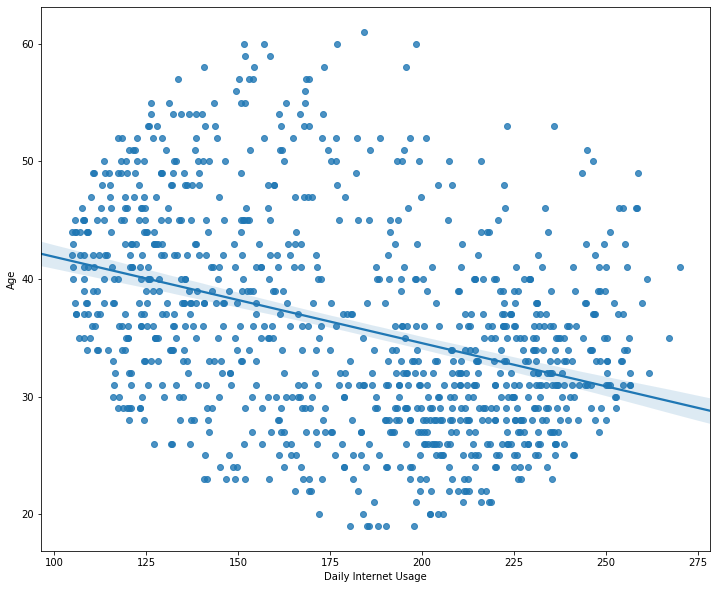

In [45]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x="Daily Internet Usage",y="Age",data=df)

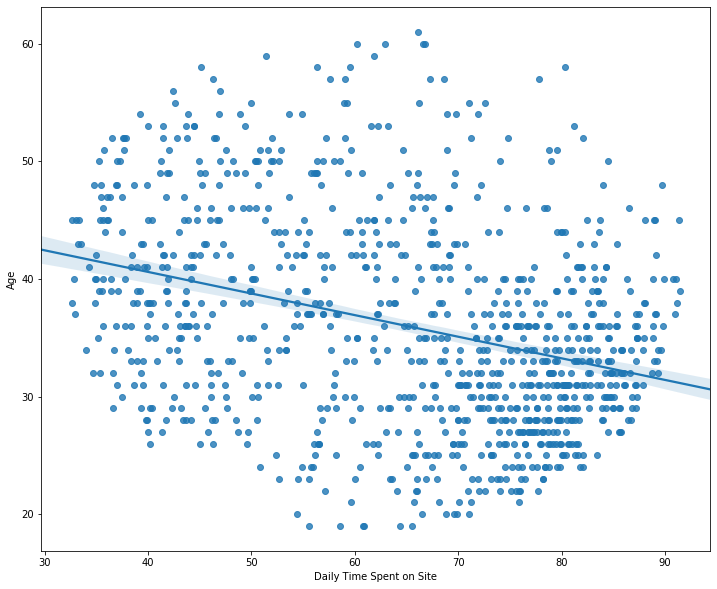

In [44]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x="Daily Time Spent on Site",y="Age",data=df)

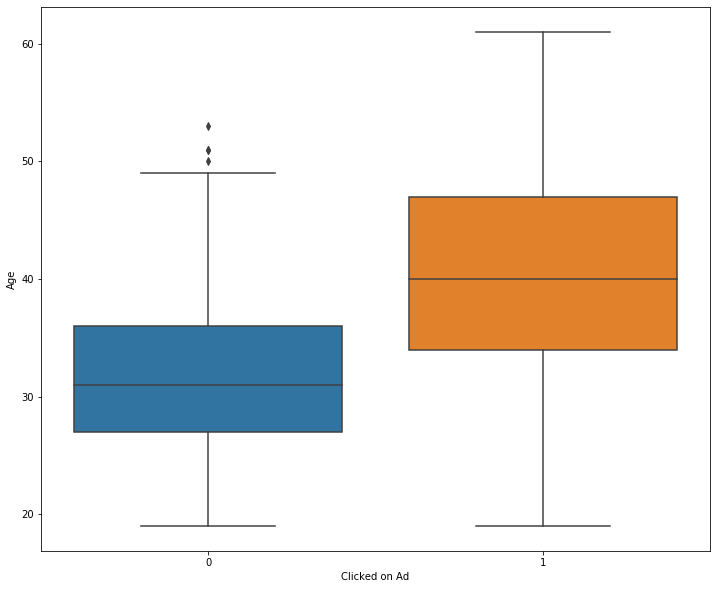

In [42]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.boxplot(x="Clicked on Ad",y="Age",data=df)

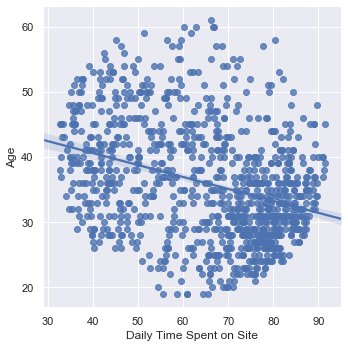

In [52]:
sns.set(color_codes=True)
sns.lmplot(x="Daily Time Spent on Site",y="Age",data=df)

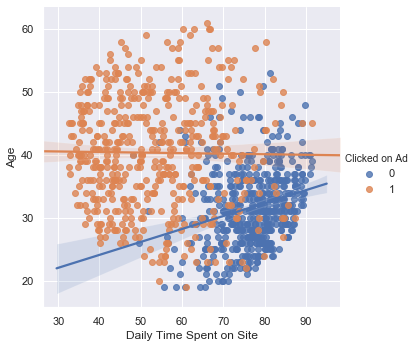

In [56]:
sns.lmplot(x="Daily Time Spent on Site",y="Age", hue="Clicked on Ad", data=df)

Below does not fit this data set. 

In [58]:
Y_hat=lm.predict(z)

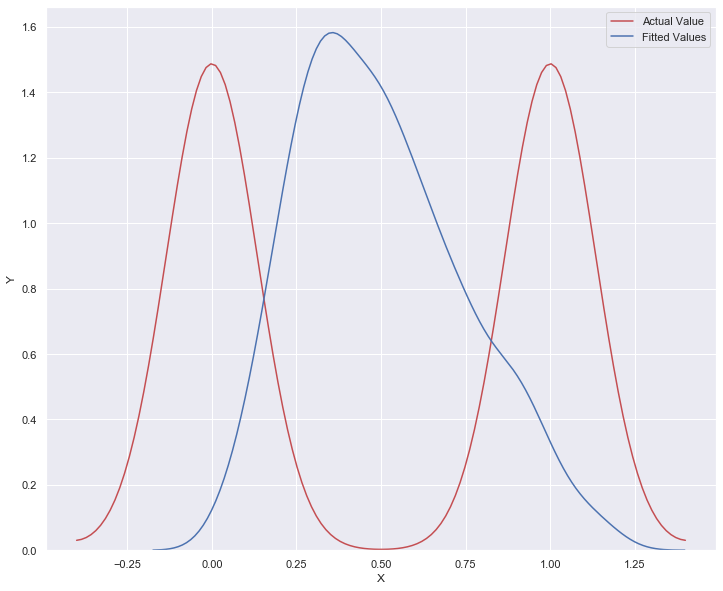

In [60]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df['Clicked on Ad'], hist = False, color = "r", label = "Actual Value")
sns.distplot(Yhat, hist=False, color = "b", label = "Fitted Values", ax=ax1)


plt.title('')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()
plt.close()

### Insights

R squared is the correlation of all the columns put in the variable Z. A high Rsquared like below is a strong indicator that the variables in z affect 'Clicked on Ad.'

About 80% of variation of 'Clicked on Ad' can be explained by the Multiple linear regression below.

In [61]:
lm.fit(z, df['Clicked on Ad'])
print('The R Squared is:', lm.score(z,df['Clicked on Ad']))

The R Squared is: 0.7996930821077681


In [67]:
from sklearn.metrics import mean_squared_error

In [62]:
y_predict_multifit = lm.predict(z)

In [69]:
lm.fit(z, df['Clicked on Ad'])
print('The Mean Square Error is', mean_squared_error(df['Clicked on Ad'],y_predict_multifit))

The Mean Square Error is 0.050076729473057954


While using MLR the rsquared is strong and the MSE is strong. 



# Abstract

I can conclude 'Daily Time Spent on Site','Daily Internet Usage','Age' are heavy influencers of people who Click on Ad's.
Specifically the ones who are over 40 years old and spend the least amount of time on site and overal on the internet. 

